In [35]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import csv
import os
import json
import scipy.stats as st
from numpy import array
from scipy.stats import sem
import datetime as dt
from datetime import datetime
import math
import matplotlib.animation as animation
import bar_chart_race as bcr


In [36]:
#Querying the API to get the covid information
Url = "https://api.covidtracking.com/v1/states/daily.json"
Covid_Info_Response = requests.get(Url)
Covid_Info_Json = Covid_Info_Response.json()
Df = pd.read_json(Url)

#Drop the columns that are not needed
Covid_Info_Df=Df.drop(Df.columns[[3,4,5,6,7,9,11,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,45,46,49,50,51,52,53,54,55]], axis=1)


#Drop the data from before Mar, 2020
Covid_Info_Df.drop(Covid_Info_Df.index[20588:] ,axis = 0, inplace=True)
Covid_Info_Df

#Drop the rows that have AS, GU, PR, VI, MP as states
Covid_Info_Df = Covid_Info_Df.drop(Covid_Info_Df[(Covid_Info_Df.state == 'AS') | (Covid_Info_Df.state == 'GU') | (Covid_Info_Df.state == 'PR') | (Covid_Info_Df.state == 'VI') | (Covid_Info_Df.state == 'MP')].index)
Covid_Info_Df.head()


,date,state,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,hospitalized,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20210307,AK,"56,886.00",33.00,NaN,2.00,305.00,"1,293.00",0,0,0,0,0
1,20210307,AL,"499,819.00",494.00,NaN,NaN,"10,148.00","45,976.00",408,2087,2347,-1,0
2,20210307,AR,"324,818.00",335.00,141.00,65.00,"5,319.00","14,926.00",165,3267,3380,22,11
4,20210307,AZ,"826,454.00",963.00,273.00,143.00,"16,328.00","57,907.00",1335,13678,45110,5,44
5,20210307,CA,"3,501,394.00","4,291.00","1,159.00",NaN,"54,124.00",NaN,3816,0,133186,258,0


In [37]:
#Converting Date into proper format
Covid_Info_Df['date'] = pd.to_datetime(Covid_Info_Df['date'], format='%Y%m%d', errors='ignore')
Covid_Info_Df.head()


,date,state,positive,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,death,hospitalized,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2021-03-07,AK,"56,886.00",33.00,NaN,2.00,305.00,"1,293.00",0,0,0,0,0
1,2021-03-07,AL,"499,819.00",494.00,NaN,NaN,"10,148.00","45,976.00",408,2087,2347,-1,0
2,2021-03-07,AR,"324,818.00",335.00,141.00,65.00,"5,319.00","14,926.00",165,3267,3380,22,11
4,2021-03-07,AZ,"826,454.00",963.00,273.00,143.00,"16,328.00","57,907.00",1335,13678,45110,5,44
5,2021-03-07,CA,"3,501,394.00","4,291.00","1,159.00",NaN,"54,124.00",NaN,3816,0,133186,258,0


In [38]:
#Splitting the Date by Year, Month and Day. Also, Renaming the columns
Covid_Info_Df[['year','month','day']] = Covid_Info_Df.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
Covid_Info_Df = Covid_Info_Df.rename(columns={
    "date":"Date", 
    "state":"State", 
    "positive": "Positive(all)",
    "deathIncrease":"Death_Increase",
    "hospitalizedIncrease":"Hospitalized_Increase",
    "hospitalizedCurrently":"Hospitalized_Currently",
    "positiveIncrease":"Positive_Increase",
    "negativeIncrease":"Negative Cases",
    "onVentilatorCurrently":"Ventilator_Currently", 
    "totalTestResultsIncrease":"TotalTestResults",
    "inIcuCurrently":"ICU_Currently",
    "death":"Deaths(all)",
    "hospitalized":"Hospitalized(all)",
    "year":"Year",
    "month":"Month",
    "day":"Day"
})
Covid_Info_Df.head(10)

,Date,State,Positive(all),Hospitalized_Currently,ICU_Currently,Ventilator_Currently,Deaths(all),Hospitalized(all),Positive_Increase,Negative Cases,TotalTestResults,Death_Increase,Hospitalized_Increase,Year,Month,Day
0,2021-03-07,AK,"56,886.00",33.00,NaN,2.00,305.00,"1,293.00",0,0,0,0,0,2021,03,07
1,2021-03-07,AL,"499,819.00",494.00,NaN,NaN,"10,148.00","45,976.00",408,2087,2347,-1,0,2021,03,07
2,2021-03-07,AR,"324,818.00",335.00,141.00,65.00,"5,319.00","14,926.00",165,3267,3380,22,11,2021,03,07
4,2021-03-07,AZ,"826,454.00",963.00,273.00,143.00,"16,328.00","57,907.00",1335,13678,45110,5,44,2021,03,07
5,2021-03-07,CA,"3,501,394.00","4,291.00","1,159.00",NaN,"54,124.00",NaN,3816,0,133186,258,0,2021,03,07
6,2021-03-07,CO,"436,602.00",326.00,NaN,NaN,"5,989.00","23,904.00",840,0,38163,3,18,2021,03,07
7,2021-03-07,CT,"285,330.00",428.00,NaN,NaN,"7,704.00",NaN,0,0,0,0,0,2021,03,07
8,2021-03-07,DC,"41,419.00",150.00,38.00,16.00,"1,030.00",NaN,146,0,5726,0,0,2021,03,07
9,2021-03-07,DE,"88,354.00",104.00,13.00,NaN,"1,473.00",NaN,215,917,5867,9,0,2021,03,07
10,2021-03-07,FL,"1,909,209.00","3,307.00",NaN,NaN,"32,266.00","82,237.00",4024,19166,64599,66,92,2021,03,07


In [39]:
#Grouping the covid information by Year, Month and State. This helps us to summarize the covid information by Year+Month for each state.
Grouped_Covid_Info_Df = Covid_Info_Df.groupby(['Year','Month','State']).agg({"Positive(all)":'sum',
                                                                  "Hospitalized_Currently":'sum',
                                                                  "Hospitalized_Increase":'sum',
                                                                  "Hospitalized(all)":'sum',
                                                                  "Positive_Increase":'sum',
                                                                  "Ventilator_Currently":'sum',
                                                                  "Deaths(all)":'sum',
                                                                  "ICU_Currently":'sum',
                                                                  "Death_Increase":'sum',
                                                                   "Negative Cases":"sum",
                                                                   "TotalTestResults":"sum"
                                                                    })
Grouped_Covid_Info_Graphs_Df = Grouped_Covid_Info_Df.reset_index()
Grouped_Covid_Info_Df = Grouped_Covid_Info_Df.reset_index()
Grouped_Covid_Info_Df.head()


,Year,Month,State,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase,Negative Cases,TotalTestResults
0,2020,03,AK,789.00,0.00,12,72.00,128,0.00,13.00,0.00,3,0,3705
1,2020,03,AL,"5,640.00","1,003.00",0,0.00,981,0.00,30.00,0.00,13,6298,7279
2,2020,03,AR,"3,759.00",376.00,0,0.00,523,111.00,34.00,0.00,8,5953,6476
3,2020,03,AZ,"7,133.00",0.00,530,"3,927.00",1287,0.00,113.00,0.00,24,18055,27966
4,2020,03,CA,"45,262.00","5,863.00",0,0.00,7429,0.00,910.00,"2,274.00",153,21310,28739


In [40]:
#Retrieving the hospital information from a csv file and drop the columns that are not needed.
Hospital_info_path = "../COVID-19-impact-on-Hospital-systems/Hospital data.csv"
Hospital_Data= pd.read_csv(Hospital_info_path)
Hospital_Data_Df = pd.DataFrame(Hospital_Data)
Hospital_Data_Df=Hospital_Data_Df.drop(Hospital_Data_Df.columns[[3]], axis=1)

Hospital_Data_Df.head()

,State,Number_Hospitals,Staff_Beds
0,AK,10,1274
1,AL,90,15127
2,AR,51,8011
3,AS,1,0
4,AZ,78,13774


In [41]:
#Merging the Grouped Covid info with Hospital information to get the final clean dataset.
Clean_Covid_Data_Df = pd.merge(Grouped_Covid_Info_Df,Hospital_Data_Df)
Clean_Covid_Data_Df.head()

,Year,Month,State,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase,Negative Cases,TotalTestResults,Number_Hospitals,Staff_Beds
0,2020,03,AK,789.00,0.00,12,72.00,128,0.00,13.00,0.00,3,0,3705,10,1274
1,2020,04,AK,"8,290.00",386.00,26,946.00,227,0.00,230.00,0.00,6,0,15406,10,1274
2,2020,05,AK,"12,268.00",379.00,12,"1,378.00",108,5.00,305.00,0.00,1,0,32576,10,1274
3,2020,06,AK,"20,522.00",422.00,18,"1,784.00",481,39.00,351.00,0.00,4,0,60490,10,1274
4,2020,07,AK,"55,751.00",952.00,83,"3,262.00",2049,46.00,558.00,0.00,9,0,120921,10,1274


In [42]:
#Calculate the total number of Positive cases, negative cases, ICU cases, and deaths for each state.
Grouped_Covid_Info_Df = Grouped_Covid_Info_Df.groupby(['State']).agg({"Positive_Increase":'sum',"Negative Cases":'sum',"Ventilator_Currently":'sum',"TotalTestResults":'sum',"Death_Increase":'sum',"Hospitalized_Increase":'sum',"ICU_Currently":'sum'})
Grouped_Covid_Info_Df = Grouped_Covid_Info_Df.reset_index()
Clean_Covid_Hosp_Df= pd.merge(Grouped_Covid_Info_Df,Hospital_Data_Df)
Clean_Covid_Hosp_Df.head()


,State,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,ICU_Currently,Number_Hospitals,Staff_Beds
0,AK,56886,0,"2,101.00",1731620,305,1293,0.00,10,1274
1,AL,499819,1931711,0.00,2323788,10148,45976,0.00,90,15127
2,AR,324818,2480710,"34,700.00",2736436,5319,14926,"52,440.00",51,8011
3,AZ,826452,3072983,"112,235.00",7908072,16328,57903,"172,806.00",78,13774
4,CA,3501341,-462,0.00,49645499,54124,0,"668,693.00",339,73849


In [43]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the Covid positive cases for each state.

# Use groupby and summary statistical methods to calculate the following properties of each State: 
Cases_group = Clean_Covid_Data_Df.groupby('State')

# mean, median, variance, standard deviation, and SEM of the Positive cases. 
Positive_Mean = Cases_group.mean()
Positive_Mean = Positive_Mean['Positive_Increase']

Positive_Median = Cases_group.median()
Positive_Median = Positive_Median['Positive_Increase']

Positive_std = Cases_group.std()
Positive_std = Positive_std['Positive_Increase']

Positive_var = Cases_group.var()
Positive_var = Positive_var['Positive_Increase']

Positive_sem = Covid_Info_Df.groupby('State').agg(['mean','sem'])
Positive_sem = Positive_sem['Positive_Increase']['sem']
Positive_sem

# Assemble the resulting series into a single summary dataframe.
Summary_Statistics_Dict = {'Mean of Positive Cases':Positive_Mean, 'Median of Positive Cases':Positive_Median, 'Variance of Positive Cases': Positive_var, 'Std of Positive Cases': Positive_std, 'Sem of Positive Cases': Positive_sem}
Summary_Statistics_DF = pd.DataFrame(Summary_Statistics_Dict)
pd.options.display.float_format = '{:20,.2f}'.format

Summary_Statistics_DF.head()

,Mean of Positive Cases,Median of Positive Cases,Variance of Positive Cases,Std of Positive Cases,Sem of Positive Cases
State,,,,,
AK,"4,375.85",2293,"28,516,230.47","5,340.06",10.18
AL,"38,447.62",33613,"1,177,242,076.42","34,310.96",63.52
AR,"24,986.00",21734,"543,777,467.33","23,319.04",45.59
AZ,"63,573.23",27825,"5,511,433,441.03","74,239.03",137.93
CA,"269,333.92",118149,"117,981,890,539.91","343,484.92",615.31


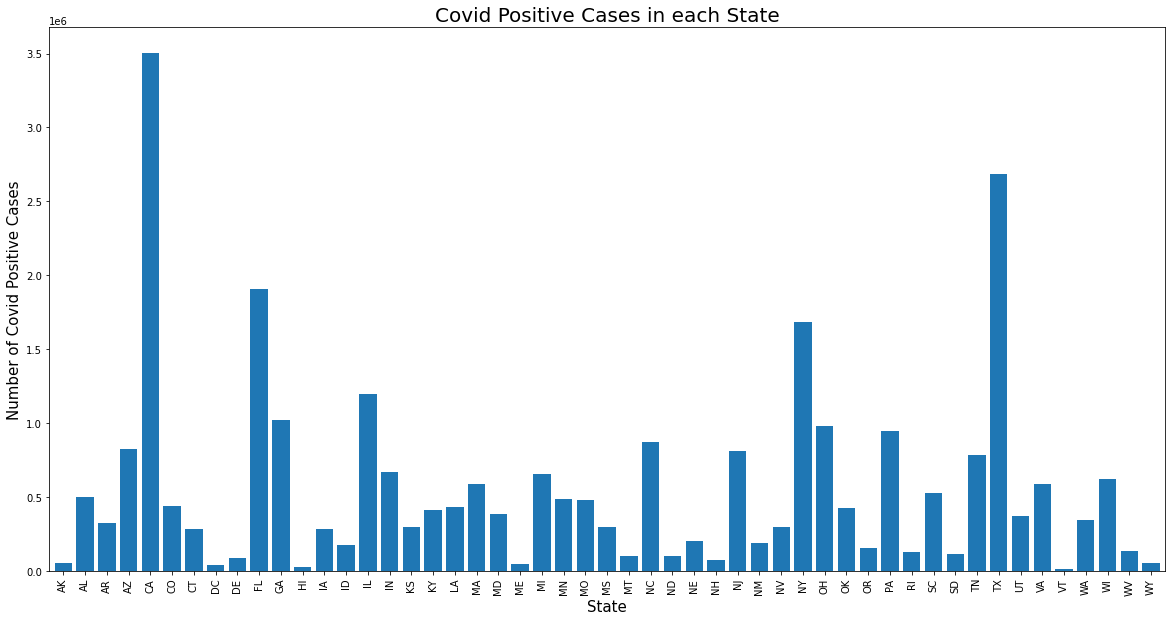

,Positive_Increase
State,
AK,56886
AL,499819
AR,324818
AZ,826452
CA,3501341


<Figure size 432x288 with 0 Axes>

In [44]:
#Generate a bar plot showing the total number of Covid positive cases across all states using pandas.
#y-axis values are multiplied by *1M
Barplot_df = Clean_Covid_Hosp_Df[['State','Positive_Increase']]
Barplot_df = Barplot_df.set_index("State")

Barplot_df.plot(kind="bar", figsize=(20,10), legend=False, width = 0.8)
plt.title("Covid Positive Cases in each State",{'fontsize':20})
plt.ylabel("Number of Covid Positive Cases",{'fontsize':15})
plt.xlabel("State",{'fontsize':15})
plt.show()
plt.tight_layout()
Barplot_df.head()

Text(0.5, 1.0, 'Positive cases in each state')

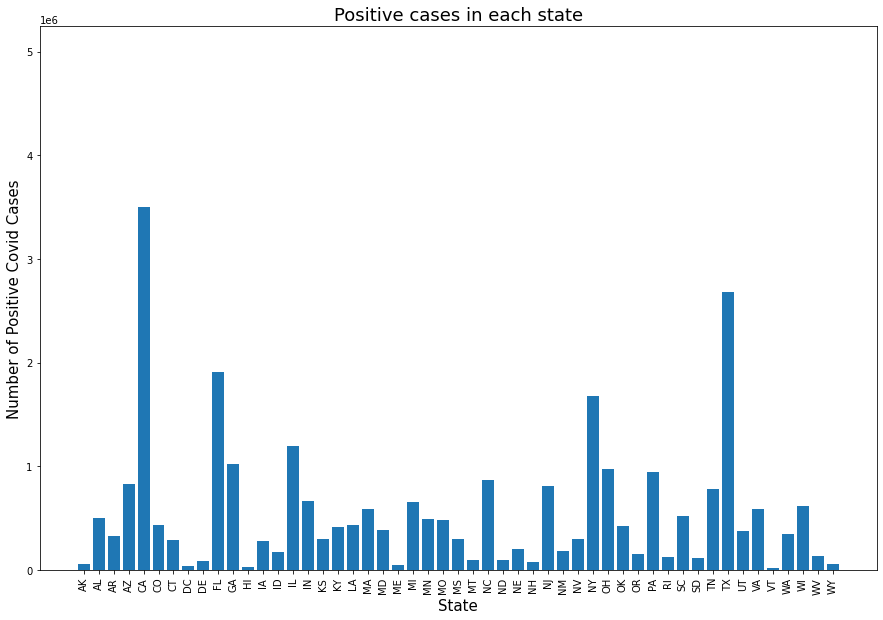

In [45]:
#Generate a bar plot showing the total number of Covid positive cases across all states using pyplot.
x_axis = np.arange(len(Barplot_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,10))
low = min(Barplot_df['Positive_Increase'])
high = max(Barplot_df['Positive_Increase'])
plt.ylim([0, math.ceil(high+0.5*(high-low))])
plt.bar(x_axis, Barplot_df['Positive_Increase'], alpha=1.0, align="center", width = 0.8)
plt.xticks(tick_locations,Barplot_df.index.values,  rotation="vertical")
plt.xlabel("State", size=15)
plt.ylabel("Number of Positive Covid Cases", size=15)
plt.title("Positive cases in each state", size=18)



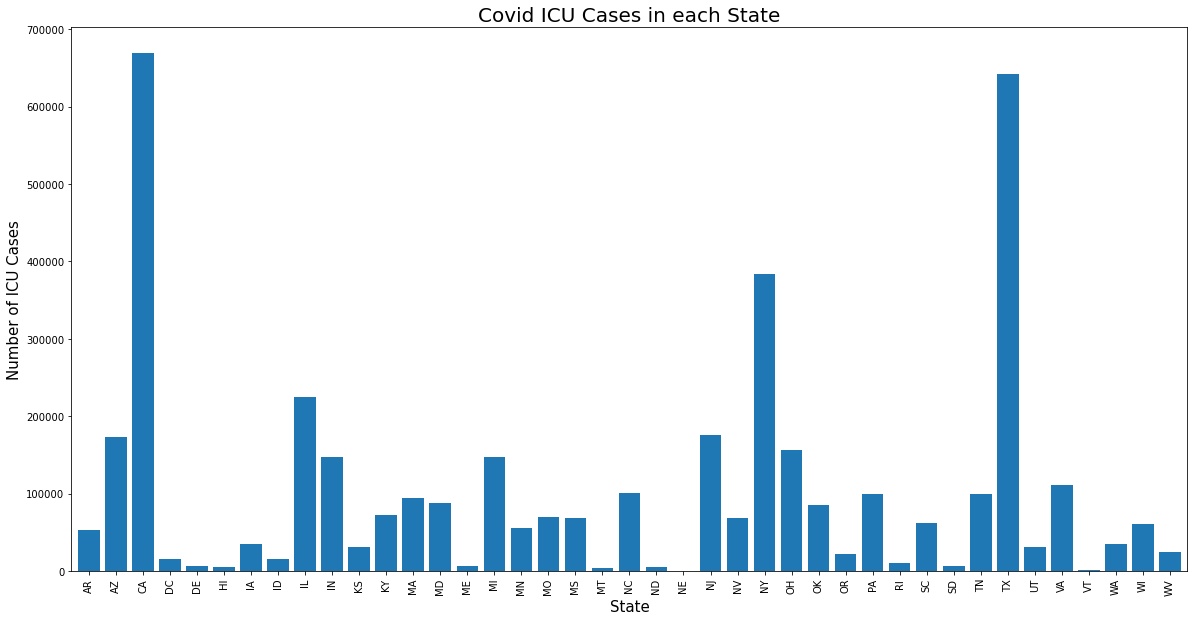

<Figure size 432x288 with 0 Axes>

In [46]:
#Generate a bar plot showing the total number of ICU cases, Hospital beds for each month across all states

Barplot_ICU_df = Clean_Covid_Hosp_Df[['State','ICU_Currently']]
Barplot_ICU_df = Barplot_ICU_df.set_index("State")
#Barplot_ICU_df = Barplot_ICU_df.loc[(Barplot_ICU_df['ICU_Currently'] != 0.00)
Barplot_ICU_df = Barplot_ICU_df.drop(Barplot_ICU_df[Barplot_ICU_df.ICU_Currently == 0.00].index)
Barplot_ICU_df.plot(kind="bar", figsize=(20,10), legend=False, width = 0.8)
plt.title("Covid ICU Cases in each State",{'fontsize':20})
plt.ylabel("Number of ICU Cases",{'fontsize':15})
plt.xlabel("State",{'fontsize':15})
plt.show()
plt.tight_layout()



In [47]:
Grouped_Covid_Timeline_Df = Clean_Covid_Data_Df.groupby(['Year','Month']).agg({"Positive_Increase":'sum',"Negative Cases":'sum',"Ventilator_Currently":'sum',"TotalTestResults":'sum',"Death_Increase":'sum',"Hospitalized_Increase":'sum'})
Grouped_Covid_Timeline_Df = Grouped_Covid_Timeline_Df.reset_index()

Grouped_Covid_Timeline_Df

,Year,Month,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase
0,2020,03,196520,458212,"2,496.00",1174190,4315,6696
1,2020,04,875438,1832032,"136,176.00",5490850,55223,38399
2,2020,05,717818,4109832,"159,218.00",11451542,41091,73150
3,2020,06,831099,5629667,"82,683.00",16619045,19458,31513
4,2020,07,1895445,7552639,"72,562.00",25651159,25181,63101
5,2020,08,1445953,7112974,"73,122.00",25464201,30018,61146
6,2020,09,1182848,6667222,"49,880.00",27503749,23057,37446
7,2020,10,1879604,7502745,"57,416.00",36534605,23353,53485
8,2020,11,4455231,9205551,"126,496.00",48085830,36746,92675
9,2020,12,6298552,8124049,"231,094.00",55733109,76705,126244


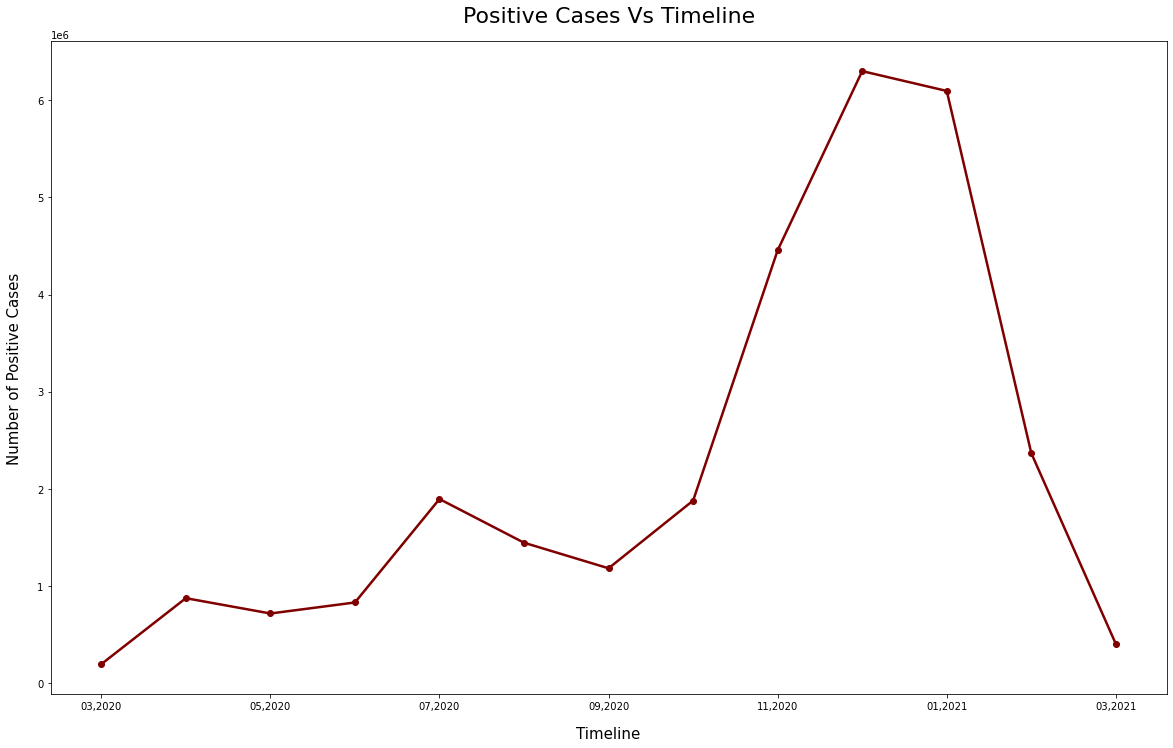

In [50]:
Grouped_Covid_Timeline_Df['Timeline'] = Grouped_Covid_Timeline_Df.Month + ',' + Grouped_Covid_Timeline_Df.Year
Grouped_Covid_Timeline_Df.set_index('Timeline')['Positive_Increase'].plot(figsize=(20, 12), linewidth=2.5, color='maroon', marker='o')
plt.xlabel("Timeline", labelpad=15,fontsize=15)
plt.ylabel("Number of Positive Cases", labelpad=15, fontsize=15)
plt.title("Positive Cases Vs Timeline", y=1.02, fontsize=22);

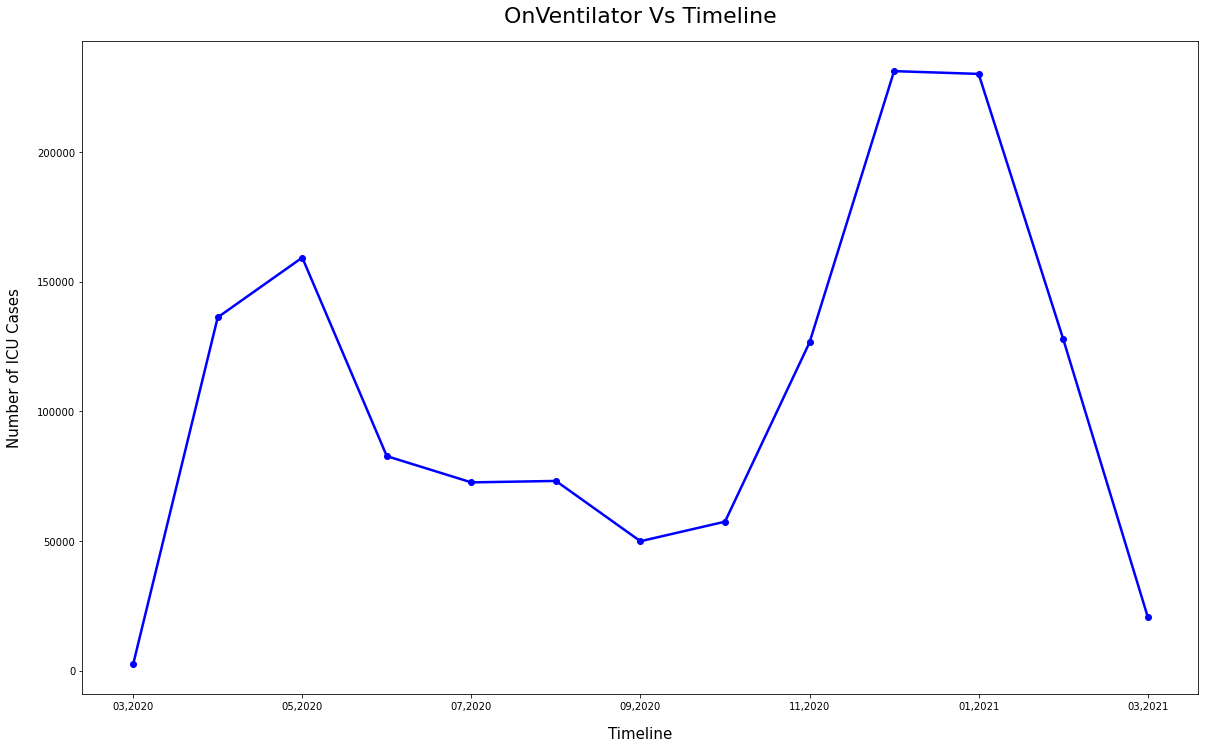

In [52]:
Grouped_Covid_Timeline_Df['Timeline'] = Grouped_Covid_Timeline_Df.Month + ',' + Grouped_Covid_Timeline_Df.Year
Grouped_Covid_Timeline_Df.set_index('Timeline')['Ventilator_Currently'].plot(figsize=(20, 12), linewidth=2.5, color='blue', marker='o')
plt.xlabel("Timeline", labelpad=15,fontsize=15)
plt.ylabel("Number of ICU Cases", labelpad=15, fontsize=15)
plt.title("OnVentilator Vs Timeline", y=1.02, fontsize=22);

In [53]:
death_percent = Grouped_Covid_Timeline_Df['Death_Increase']/Grouped_Covid_Timeline_Df['Positive_Increase']
death_percent_df = pd.DataFrame(death_percent) 
death_percent_df = death_percent_df.rename(columns={0:"Death percentage of Positive Cases"})

positive_percent = Grouped_Covid_Timeline_Df['Positive_Increase']/Grouped_Covid_Timeline_Df['TotalTestResults']
positive_percent_df = pd.DataFrame(positive_percent) 
positive_percent_df = positive_percent_df.rename(columns={0:"Positive Case percentage"})

ICU_percent = Grouped_Covid_Timeline_Df['Ventilator_Currently']/Grouped_Covid_Timeline_Df['Positive_Increase']
ICU_percent_df = pd.DataFrame(ICU_percent) 
ICU_percent_df = ICU_percent_df.rename(columns={0:"ICU percentage of Positive Cases"})



In [54]:
Grouped_Covid_Timeline_Df_Positve_percent = pd.merge(Grouped_Covid_Timeline_Df, positive_percent_df,left_index=True, right_index=True)
Grouped_Covid_Timeline_Df_Positve_percent

,Year,Month,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,Timeline,Positive Case percentage
0,2020,03,196520,458212,"2,496.00",1174190,4315,6696,"03,2020",0.17
1,2020,04,875438,1832032,"136,176.00",5490850,55223,38399,"04,2020",0.16
2,2020,05,717818,4109832,"159,218.00",11451542,41091,73150,"05,2020",0.06
3,2020,06,831099,5629667,"82,683.00",16619045,19458,31513,"06,2020",0.05
4,2020,07,1895445,7552639,"72,562.00",25651159,25181,63101,"07,2020",0.07
5,2020,08,1445953,7112974,"73,122.00",25464201,30018,61146,"08,2020",0.06
6,2020,09,1182848,6667222,"49,880.00",27503749,23057,37446,"09,2020",0.04
7,2020,10,1879604,7502745,"57,416.00",36534605,23353,53485,"10,2020",0.05
8,2020,11,4455231,9205551,"126,496.00",48085830,36746,92675,"11,2020",0.09
9,2020,12,6298552,8124049,"231,094.00",55733109,76705,126244,"12,2020",0.11


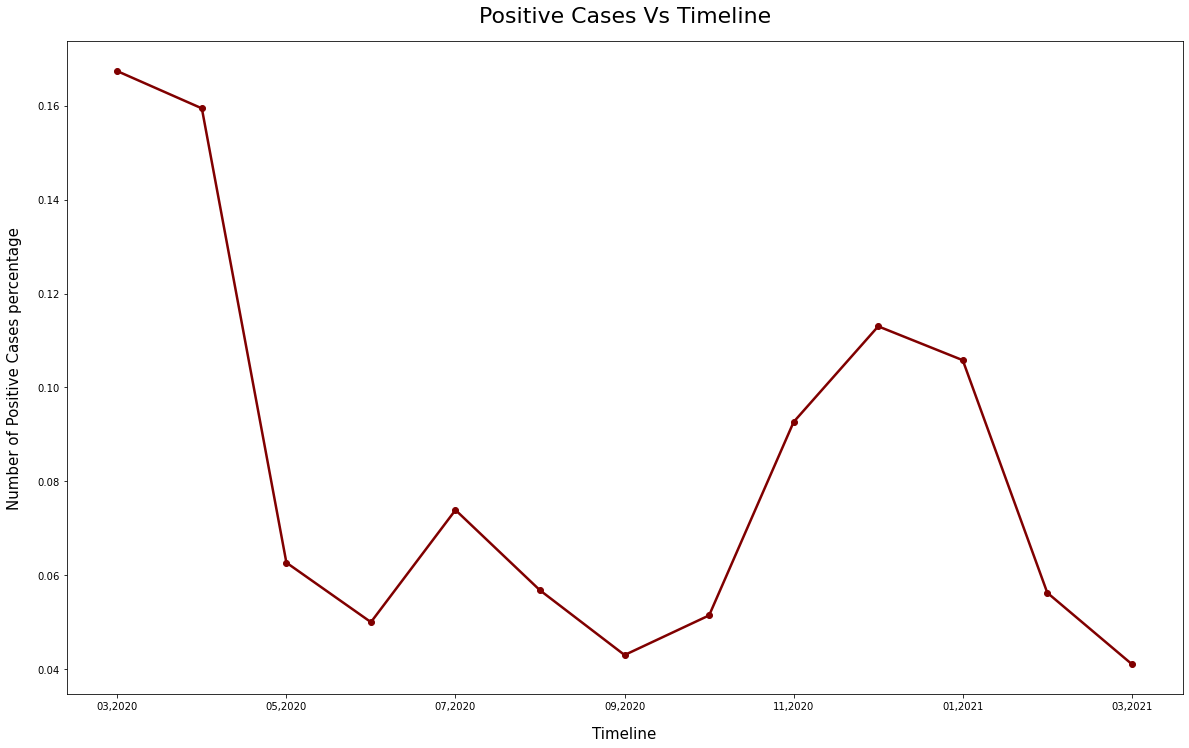

In [55]:
Grouped_Covid_Timeline_Df_Positve_percent['Timeline'] = Grouped_Covid_Timeline_Df.Month + ',' + Grouped_Covid_Timeline_Df.Year
Grouped_Covid_Timeline_Df_Positve_percent.set_index('Timeline')['Positive Case percentage'].plot(figsize=(20, 12), linewidth=2.5, color='maroon', marker='o')

plt.xlabel("Timeline", labelpad=15,fontsize=15)
plt.ylabel("Number of Positive Cases percentage", labelpad=15, fontsize=15)
plt.title("Positive Cases Vs Timeline", y=1.02, fontsize=22);

In [56]:
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent = pd.merge(Grouped_Covid_Timeline_Df_Positve_percent, ICU_percent_df,left_index=True, right_index=True)
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent.style.format({'Positive Case percentage':'{:.2%}','ICU percentage of Positive Cases':"{:.2%}"})

,Year,Month,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,Timeline,Positive Case percentage,ICU percentage of Positive Cases
0,2020,03,196520,458212,2496.000000,1174190,4315,6696,"03,2020",16.74%,1.27%
1,2020,04,875438,1832032,136176.000000,5490850,55223,38399,"04,2020",15.94%,15.56%
2,2020,05,717818,4109832,159218.000000,11451542,41091,73150,"05,2020",6.27%,22.18%
3,2020,06,831099,5629667,82683.000000,16619045,19458,31513,"06,2020",5.00%,9.95%
4,2020,07,1895445,7552639,72562.000000,25651159,25181,63101,"07,2020",7.39%,3.83%
5,2020,08,1445953,7112974,73122.000000,25464201,30018,61146,"08,2020",5.68%,5.06%
6,2020,09,1182848,6667222,49880.000000,27503749,23057,37446,"09,2020",4.30%,4.22%
7,2020,10,1879604,7502745,57416.000000,36534605,23353,53485,"10,2020",5.14%,3.05%
8,2020,11,4455231,9205551,126496.000000,48085830,36746,92675,"11,2020",9.27%,2.84%
9,2020,12,6298552,8124049,231094.000000,55733109,76705,126244,"12,2020",11.30%,3.67%


In [57]:
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent_and_deaths = pd.merge(Grouped_Covid_Timeline_Df_Positve_and_ICU_percent, death_percent_df,left_index=True, right_index=True)
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent_and_deaths
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent_and_deaths.style.format({'Positive Case percentage':'{:.2%}','ICU percentage of Positive Cases':"{:.2%}",'Death percentage of Positive Cases':"{:.2%}"})

,Year,Month,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,Timeline,Positive Case percentage,ICU percentage of Positive Cases,Death percentage of Positive Cases
0,2020,03,196520,458212,2496.000000,1174190,4315,6696,"03,2020",16.74%,1.27%,2.20%
1,2020,04,875438,1832032,136176.000000,5490850,55223,38399,"04,2020",15.94%,15.56%,6.31%
2,2020,05,717818,4109832,159218.000000,11451542,41091,73150,"05,2020",6.27%,22.18%,5.72%
3,2020,06,831099,5629667,82683.000000,16619045,19458,31513,"06,2020",5.00%,9.95%,2.34%
4,2020,07,1895445,7552639,72562.000000,25651159,25181,63101,"07,2020",7.39%,3.83%,1.33%
5,2020,08,1445953,7112974,73122.000000,25464201,30018,61146,"08,2020",5.68%,5.06%,2.08%
6,2020,09,1182848,6667222,49880.000000,27503749,23057,37446,"09,2020",4.30%,4.22%,1.95%
7,2020,10,1879604,7502745,57416.000000,36534605,23353,53485,"10,2020",5.14%,3.05%,1.24%
8,2020,11,4455231,9205551,126496.000000,48085830,36746,92675,"11,2020",9.27%,2.84%,0.82%
9,2020,12,6298552,8124049,231094.000000,55733109,76705,126244,"12,2020",11.30%,3.67%,1.22%


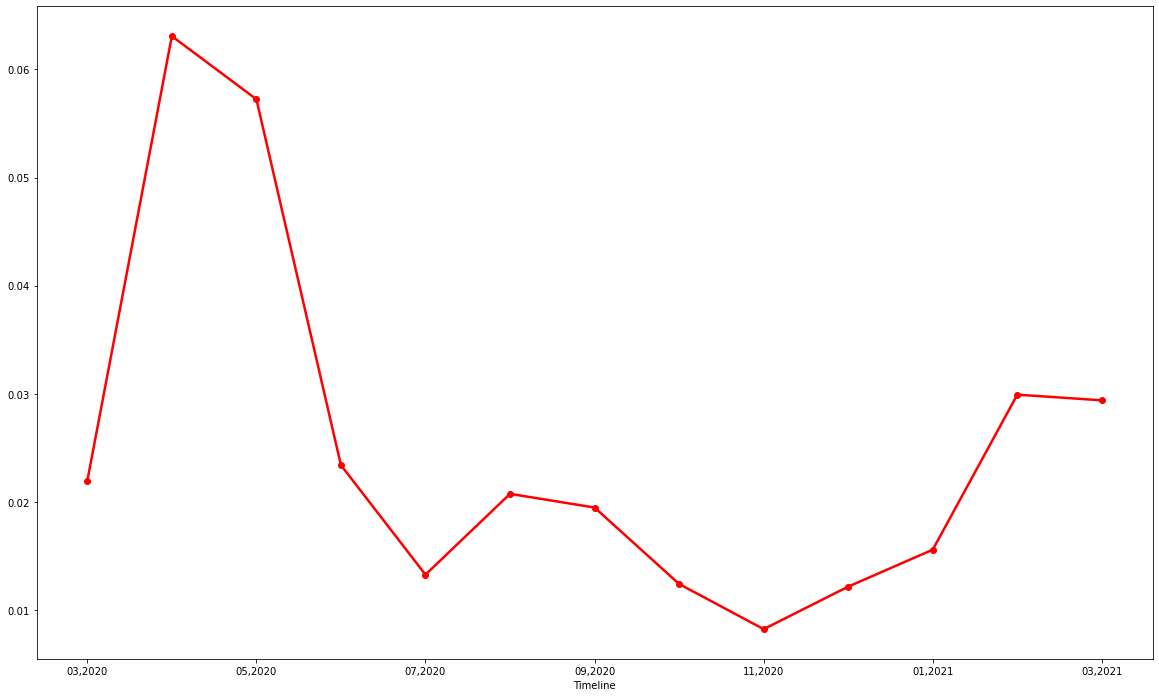

In [58]:
Deaths_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_and_ICU_percent_and_deaths.set_index('Timeline')['Death percentage of Positive Cases'].plot(figsize=(20, 12), linewidth=2.5, color='red', marker='o')

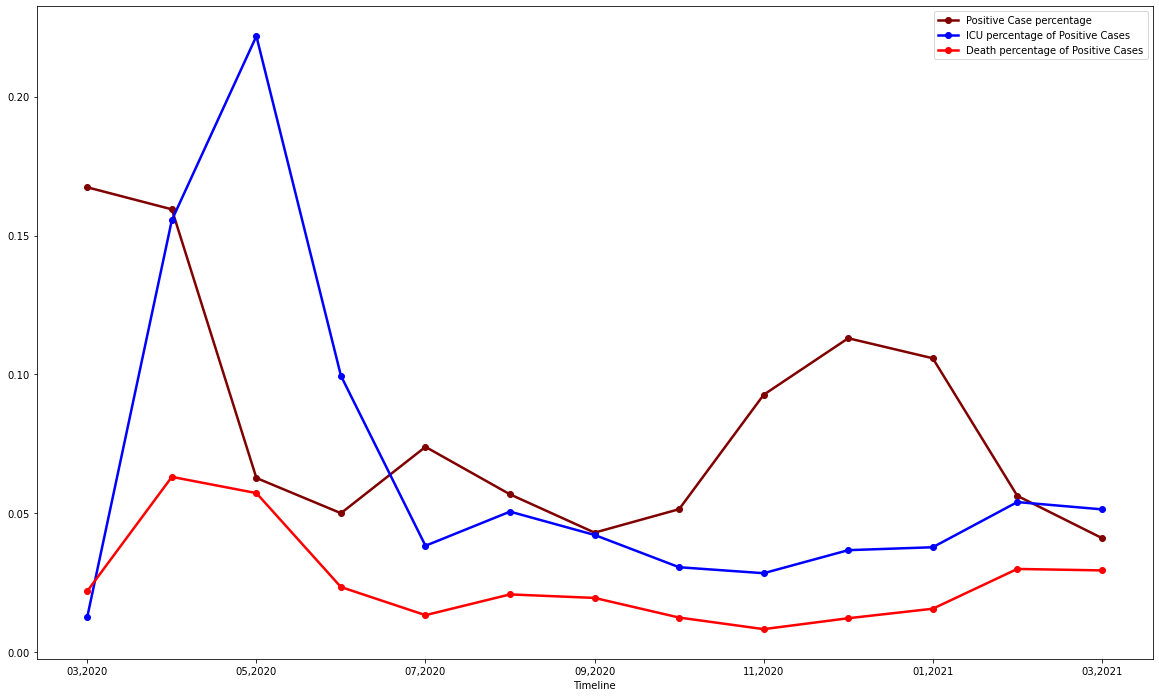

In [59]:
Positve_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_percent.set_index('Timeline')['Positive Case percentage'].plot(figsize=(20, 12), linewidth=2.5, color='maroon', marker='o')
ICU_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_and_ICU_percent.set_index('Timeline')['ICU percentage of Positive Cases'].plot(figsize=(20, 12), linewidth=2.5, color='blue', marker='o')
Deaths_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_and_ICU_percent_and_deaths.set_index('Timeline')['Death percentage of Positive Cases'].plot(figsize=(20, 12), linewidth=2.5, color='red', marker='o')
plt.legend()

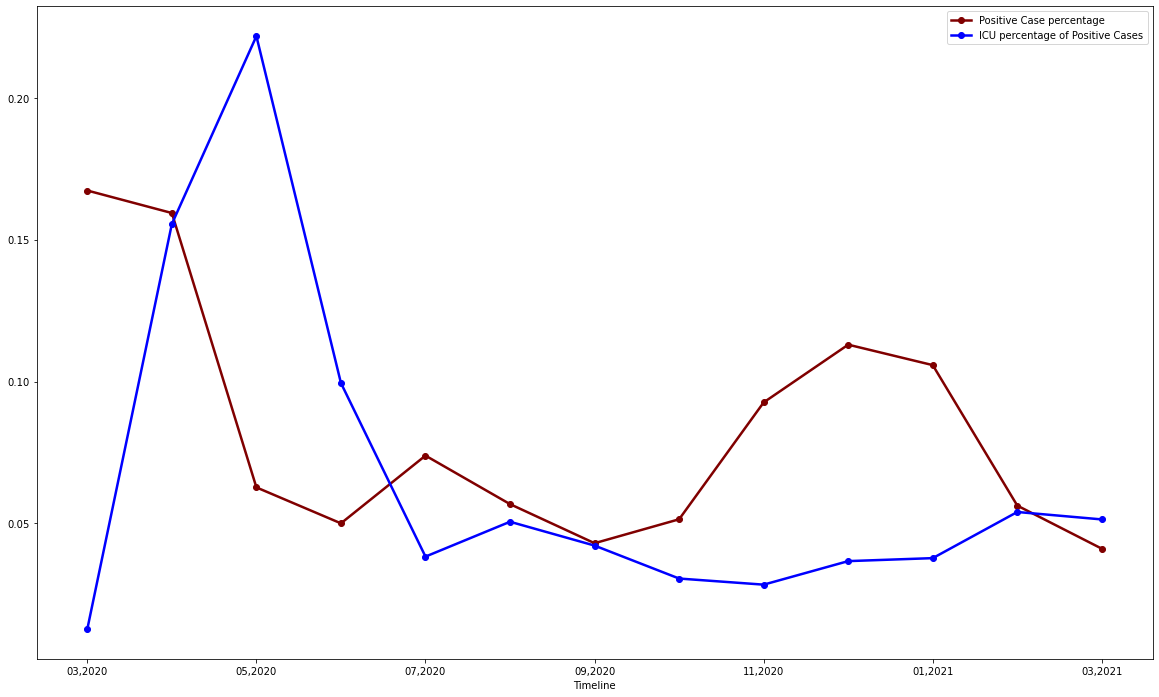

In [60]:
Positve_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_percent.set_index('Timeline')['Positive Case percentage'].plot(figsize=(20, 12), linewidth=2.5, color='maroon', marker='o')
ICU_percent_lineplot = Grouped_Covid_Timeline_Df_Positve_and_ICU_percent.set_index('Timeline')['ICU percentage of Positive Cases'].plot(figsize=(20, 12), linewidth=2.5, color='blue', marker='o')
plt.legend()

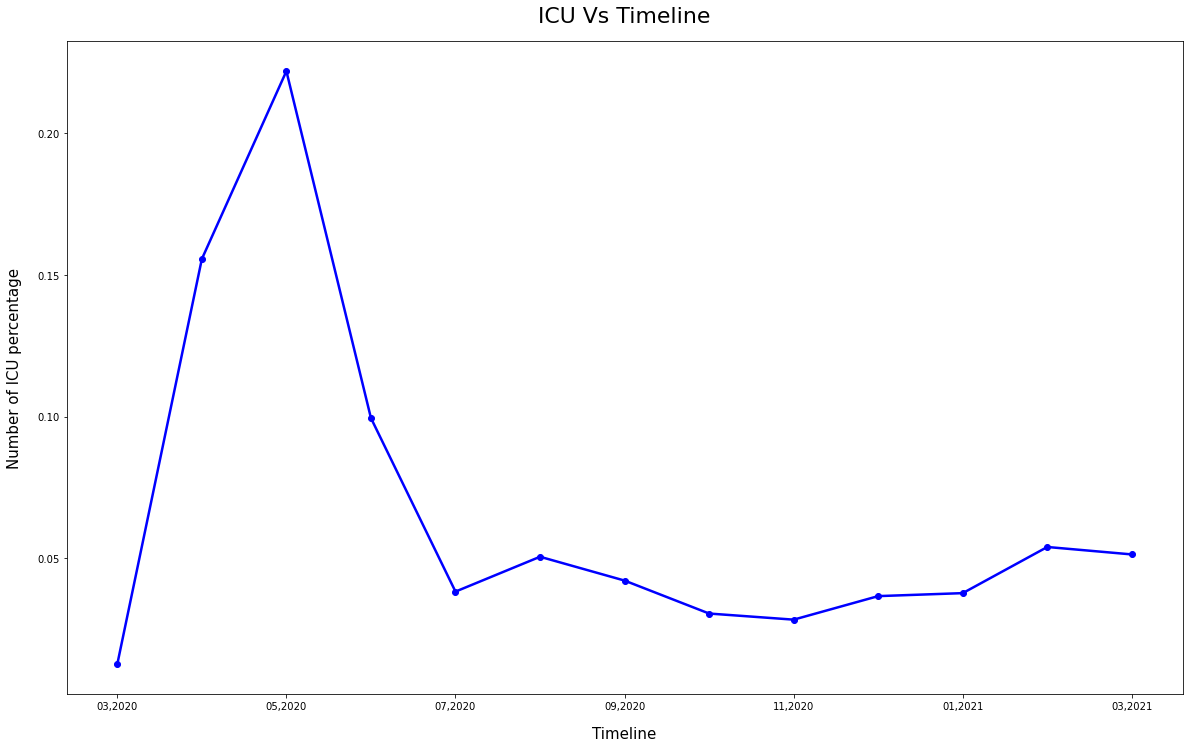

In [61]:
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent['Timeline'] = Grouped_Covid_Timeline_Df.Month + ',' + Grouped_Covid_Timeline_Df.Year
Grouped_Covid_Timeline_Df_Positve_and_ICU_percent.set_index('Timeline')['ICU percentage of Positive Cases'].plot(figsize=(20, 12), linewidth=2.5, color='blue', marker='o')
plt.xlabel("Timeline", labelpad=15,fontsize=15)
plt.ylabel("Number of ICU percentage", labelpad=15, fontsize=15)
plt.title("ICU Vs Timeline", y=1.02, fontsize=22);

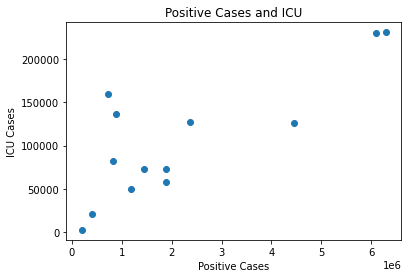

,Year,Month,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,Timeline
0,2020,03,196520,458212,"2,496.00",1174190,4315,6696,"03,2020"
1,2020,04,875438,1832032,"136,176.00",5490850,55223,38399,"04,2020"
2,2020,05,717818,4109832,"159,218.00",11451542,41091,73150,"05,2020"
3,2020,06,831099,5629667,"82,683.00",16619045,19458,31513,"06,2020"
4,2020,07,1895445,7552639,"72,562.00",25651159,25181,63101,"07,2020"
5,2020,08,1445953,7112974,"73,122.00",25464201,30018,61146,"08,2020"
6,2020,09,1182848,6667222,"49,880.00",27503749,23057,37446,"09,2020"
7,2020,10,1879604,7502745,"57,416.00",36534605,23353,53485,"10,2020"
8,2020,11,4455231,9205551,"126,496.00",48085830,36746,92675,"11,2020"
9,2020,12,6298552,8124049,"231,094.00",55733109,76705,126244,"12,2020"


In [62]:
# apply scatter plot
plt.scatter(Grouped_Covid_Timeline_Df['Positive_Increase'],Grouped_Covid_Timeline_Df['Ventilator_Currently'])

# apply title to chart
plt.title('Positive Cases and ICU')

# apply x-label to chart
plt.xlabel('Positive Cases')

# apply y-label to chart
plt.ylabel('ICU Cases')

# print scatter plot
plt.show()

Grouped_Covid_Timeline_Df

In [63]:
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','IL','NJ','NY','OH','PA','TX']
cases = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = Grouped_Covid_Info_Graphs_Df.loc[Grouped_Covid_Info_Graphs_Df['State'] == state]
      

    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    icu_cases = spec_year['ICU_Currently']
    cases.append(icu_cases)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = icu_cases.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (icu_cases.loc[(spec_year['ICU_Currently'] >= UCL_out) | 
                                        (spec_year['ICU_Currently'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 18876.75
Lower bound for CA is 4539.125
Upper bound for CA is 80046.125
CA potential outliers: 2
The Interquartile Range for IL is 19671.25
Lower bound for IL is -18844.125
Upper bound for IL is 59840.875
IL potential outliers: 0
The Interquartile Range for NJ is 15525.0
Lower bound for NJ is -19854.25
Upper bound for NJ is 42245.75
NJ potential outliers: 1
The Interquartile Range for NY is 22291.0
Lower bound for NY is -28005.25
Upper bound for NY is 61158.75
NY potential outliers: 2
The Interquartile Range for OH is 3899.5
Lower bound for OH is 777.75
Upper bound for OH is 16375.75
OH potential outliers: 4
The Interquartile Range for PA is 0.0
Lower bound for PA is 0.0
Upper bound for PA is 0.0
PA potential outliers: 10
The Interquartile Range for TX is 44309.75
Lower bound for TX is -42350.125
Upper bound for TX is 134888.875
TX potential outliers: 0


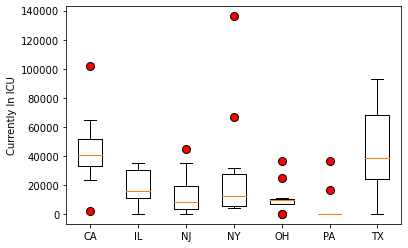

In [64]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(cases, flierprops=flierprops)
plt.ylabel('Currently In ICU')
plt.xticks([1, 2, 3, 4,5,6,7], ['CA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [65]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
deaths = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = Grouped_Covid_Info_Graphs_Df.loc[Grouped_Covid_Info_Graphs_Df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    died = spec_year['Deaths(all)']
    deaths.append(died)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = died.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (died.loc[(spec_year['Deaths(all)'] >= UCL_out) | 
                                        (spec_year['Deaths(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 387623.5
Lower bound for CA is -469645.0
Upper bound for CA is 1080849.0
CA potential outliers: 0
The Interquartile Range for FL is 397799.75
Lower bound for FL is -527259.625
Upper bound for FL is 1063939.375
FL potential outliers: 0
The Interquartile Range for GA is 167957.75
Lower bound for GA is -196394.375
Upper bound for GA is 475436.625
GA potential outliers: 0
The Interquartile Range for IL is 141933.5
Lower bound for IL is -70934.25
Upper bound for IL is 496799.75
IL potential outliers: 0
The Interquartile Range for NJ is 119698.5
Lower bound for NJ is 197594.5
Upper bound for NJ is 676388.5
NJ potential outliers: 2
The Interquartile Range for NY is 88944.0
Lower bound for NY is 562614.5
Upper bound for NY is 918390.5
NY potential outliers: 2
The Interquartile Range for OH is 95154.75
Lower bound for OH is -86170.625
Upper bound for OH is 294448.375
OH potential outliers: 0
The Interquartile Range for PA is 111665.0
Lower bound for PA is -2303

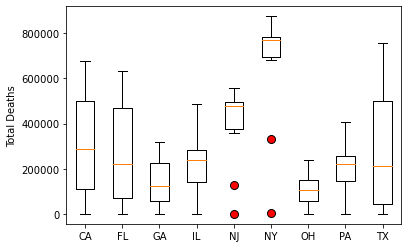

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(deaths, flierprops=flierprops)
plt.ylabel('Total Deaths')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [67]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
positive = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = Grouped_Covid_Info_Graphs_Df.loc[Grouped_Covid_Info_Graphs_Df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    Pos_case = spec_year['Positive(all)']
    positive.append(Pos_case)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = Pos_case.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (Pos_case.loc[(spec_year['Positive(all)'] >= UCL_out) | 
                                        (spec_year['Positive(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 22799731.25
Lower bound for CA is -31200573.625
Upper bound for CA is 59998351.375
CA potential outliers: 0
The Interquartile Range for FL is 20555379.0
Lower bound for FL is -29179131.5
Upper bound for FL is 53042384.5
FL potential outliers: 0
The Interquartile Range for GA is 8777748.75
Lower bound for GA is -11846074.625
Upper bound for GA is 23264920.375
GA potential outliers: 0
The Interquartile Range for IL is 6911310.75
Lower bound for IL is -7250479.125
Upper bound for IL is 20394763.875
IL potential outliers: 1
The Interquartile Range for NJ is 2179396.0
Lower bound for NJ is 1344780.5
Upper bound for NJ is 10062364.5
NJ potential outliers: 2
The Interquartile Range for NY is 3655719.25
Lower bound for NY is 5414762.375
Upper bound for NY is 20037639.375
NY potential outliers: 2
The Interquartile Range for OH is 4285380.75
Lower bound for OH is -5472474.875
Upper bound for OH is 11669048.125
OH potential outliers: 1
The Interquartile Range for

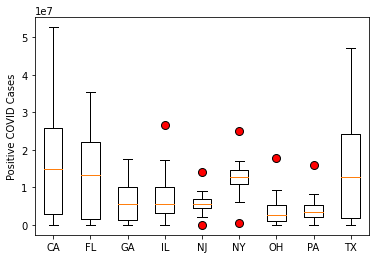

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(positive, flierprops=flierprops)
plt.ylabel('Positive COVID Cases')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [69]:
#For loop for deaths
# focus on select states for this plot
#-----------------------------------------------------------------------
#create an empty list of states and values 
keepstates = ['CA','FL','GA','IL','NJ','NY','OH','PA','TX']
hospital = []
#beds = []
#create a loop to iterate through states to calculate values

for state in keepstates:
    #identify specific states
    for_state = Grouped_Covid_Info_Graphs_Df.loc[Grouped_Covid_Info_Graphs_Df['State'] == state]
    
    #identify specific year (2020)
    spec_year = for_state.loc[(for_state["Year"] == '2020'), :]
    
    #creates vlues and append those to the table
    
    #icu currently
    hos_num = spec_year['Hospitalized(all)']
    hospital.append(hos_num)
    
    #hospital beds currently
    #hos_beds = spec_year['Hospitalized_Currently']
    #beds.append(hos_beds)
    
    #Determine quartiles, IQR, and lower and upper bounds
    quartile = hos_num.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {state} is {IQR}')
    print(f'Lower bound for {state} is {LCL_out}')
    print(f'Upper bound for {state} is {UCL_out}')
    #statement to identify outliers
    outlier = (hos_num.loc[(spec_year['Hospitalized(all)'] >= UCL_out) | 
                                        (spec_year['Hospitalized(all)'] <= LCL_out)]).count()
    print(f'{state} potential outliers: {outlier}')

The Interquartile Range for CA is 0.0
Lower bound for CA is 0.0
Upper bound for CA is 0.0
CA potential outliers: 10
The Interquartile Range for FL is 1128798.25
Lower bound for FL is -1406473.375
Upper bound for FL is 3108719.625
FL potential outliers: 0
The Interquartile Range for GA is 676301.75
Lower bound for GA is -788680.625
Upper bound for GA is 1916526.375
GA potential outliers: 0
The Interquartile Range for IL is 0.0
Lower bound for IL is 0.0
Upper bound for IL is 0.0
IL potential outliers: 10
The Interquartile Range for NJ is 603457.25
Lower bound for NJ is -688619.375
Upper bound for NJ is 1725209.625
NJ potential outliers: 0
The Interquartile Range for NY is 0.0
Lower bound for NY is 0.0
Upper bound for NY is 0.0
NY potential outliers: 10
The Interquartile Range for OH is 340707.5
Lower bound for OH is -346026.5
Upper bound for OH is 1016803.5
OH potential outliers: 1
The Interquartile Range for PA is 0.0
Lower bound for PA is 0.0
Upper bound for PA is 0.0
PA potential outl

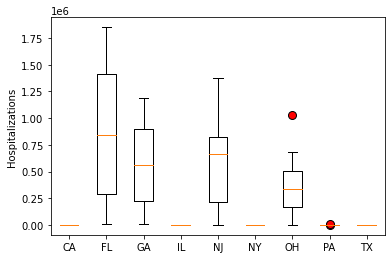

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(hospital, flierprops=flierprops)
plt.ylabel('Hospitalizations')
plt.xticks([1, 2, 3, 4,5,6,7,8,9], ['CA','FL','GA','IL','NJ','NY','OH','PA','TX'])
plt.show()

In [71]:
Grouped_Covid_Info_Df.head(5)

,State,Positive_Increase,Negative Cases,Ventilator_Currently,TotalTestResults,Death_Increase,Hospitalized_Increase,ICU_Currently
0,AK,56886,0,"2,101.00",1731620,305,1293,0.00
1,AL,499819,1931711,0.00,2323788,10148,45976,0.00
2,AR,324818,2480710,"34,700.00",2736436,5319,14926,"52,440.00"
3,AZ,826452,3072983,"112,235.00",7908072,16328,57903,"172,806.00"
4,CA,3501341,-462,0.00,49645499,54124,0,"668,693.00"


In [72]:
state_group = Grouped_Covid_Info_Graphs_Df.groupby(['State']).agg({"Positive(all)":'sum',
                                                                  "Hospitalized_Currently":'sum',
                                                                  "Hospitalized_Increase":'sum',
                                                                  "Hospitalized(all)":'sum',
                                                                  "Positive_Increase":'sum',
                                                                  "Ventilator_Currently":'sum',
                                                                  "Deaths(all)":'sum',
                                                                  "ICU_Currently":'sum',
                                                                  "Death_Increase":'sum',
                                                                 })
state_group

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
State,,,,,,,,,
AK,"6,158,147.00","17,804.00",1293,"157,626.00",56886,"2,101.00","31,486.00",0.00,305
AL,"62,062,326.00","404,951.00",45976,"6,133,645.00",499819,0.00,"1,038,264.00",0.00,10148
AR,"37,622,536.00","188,044.00",14926,"2,017,857.00",324818,"34,700.00","601,561.00","52,440.00",5319
AZ,"95,464,371.00","640,831.00",57903,"7,425,807.00",826452,"112,235.00","1,918,434.00","172,806.00",16328
CA,"379,100,459.00","2,653,612.00",0,0.00,3501341,0.00,"5,733,089.00","668,693.00",54124
CO,"49,413,695.00","231,196.00",23904,"3,478,740.00",436600,0.00,"908,462.00",0.00,5989
CT,"33,618,419.00","214,270.00",0,"1,908,439.00",285330,0.00,"1,584,666.00",0.00,7704
DC,"6,050,063.00","58,996.00",0,0.00,41419,"9,650.00","207,067.00","15,628.00",1030
DE,"10,219,638.00","61,269.00",0,0.00,88354,0.00,"228,375.00","6,818.00",1473


In [73]:
import seaborn

variables = state_group[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
                    'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
                    'Deaths(all)', 'ICU_Currently','Death_Increase']]
#table with correlations
variables.corr()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.00,0.98,0.23,0.25,1.00,0.28,0.85,0.86,0.97
Hospitalized_Currently,0.98,1.00,0.15,0.17,0.98,0.33,0.87,0.91,0.98
Hospitalized_Increase,0.23,0.15,1.00,0.99,0.21,0.18,0.22,-0.05,0.23
Hospitalized(all),0.25,0.17,0.99,1.00,0.22,0.15,0.26,-0.06,0.25
Positive_Increase,1.00,0.98,0.21,0.22,1.00,0.25,0.82,0.88,0.97
Ventilator_Currently,0.28,0.33,0.18,0.15,0.25,1.00,0.57,0.33,0.42
Deaths(all),0.85,0.87,0.22,0.26,0.82,0.57,1.00,0.75,0.93
ICU_Currently,0.86,0.91,-0.05,-0.06,0.88,0.33,0.75,1.00,0.86
Death_Increase,0.97,0.98,0.23,0.25,0.97,0.42,0.93,0.86,1.00


In [74]:
#seaborn correlation matrix heatmap
variables.corr().style.background_gradient(cmap='coolwarm')

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.000000,0.980842,0.234114,0.252813,0.995160,0.276316,0.849036,0.861798,0.972549
Hospitalized_Currently,0.980842,1.000000,0.152865,0.169071,0.981543,0.334966,0.872084,0.913980,0.979304
Hospitalized_Increase,0.234114,0.152865,1.000000,0.986530,0.208594,0.175960,0.218614,-0.050742,0.228715
Hospitalized(all),0.252813,0.169071,0.986530,1.000000,0.222466,0.153088,0.258445,-0.061439,0.253942
Positive_Increase,0.995160,0.981543,0.208594,0.222466,1.000000,0.247550,0.818181,0.879791,0.965292
Ventilator_Currently,0.276316,0.334966,0.175960,0.153088,0.247550,1.000000,0.573343,0.330743,0.424779
Deaths(all),0.849036,0.872084,0.218614,0.258445,0.818181,0.573343,1.000000,0.752544,0.927021
ICU_Currently,0.861798,0.913980,-0.050742,-0.061439,0.879791,0.330743,0.752544,1.000000,0.864067
Death_Increase,0.972549,0.979304,0.228715,0.253942,0.965292,0.424779,0.927021,0.864067,1.000000


<AxesSubplot:>

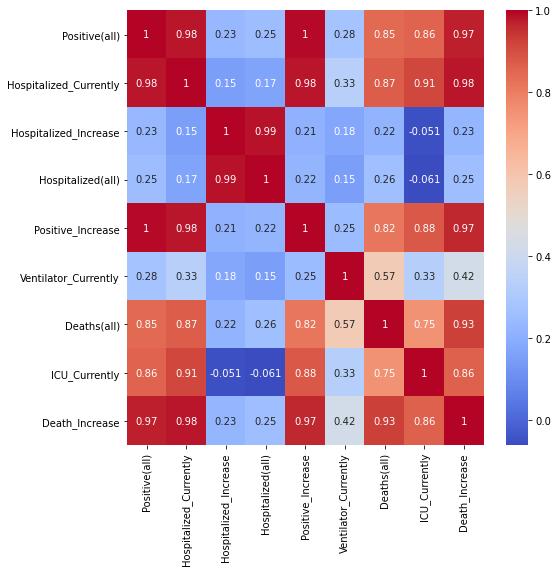

In [75]:
plt.figure(figsize=(8,8))
seaborn.heatmap(variables.corr(), annot=True, cmap="coolwarm")

In [76]:
long_data = Grouped_Covid_Info_Graphs_Df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
                    'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
                    'Deaths(all)', 'ICU_Currently','Death_Increase']]
#table with correlations
long_data.corr()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
Positive(all),1.00,0.77,0.23,0.39,0.79,0.25,0.87,0.65,0.75
Hospitalized_Currently,0.77,1.00,0.24,0.23,0.91,0.38,0.69,0.91,0.91
Hospitalized_Increase,0.23,0.24,1.00,0.71,0.27,0.24,0.21,0.08,0.25
Hospitalized(all),0.39,0.23,0.71,1.00,0.28,0.15,0.38,0.02,0.25
Positive_Increase,0.79,0.91,0.27,0.28,1.00,0.29,0.66,0.78,0.75
Ventilator_Currently,0.25,0.38,0.24,0.15,0.29,1.00,0.39,0.38,0.42
Deaths(all),0.87,0.69,0.21,0.38,0.66,0.39,1.00,0.58,0.67
ICU_Currently,0.65,0.91,0.08,0.02,0.78,0.38,0.58,1.00,0.85
Death_Increase,0.75,0.91,0.25,0.25,0.75,0.42,0.67,0.85,1.00


<AxesSubplot:>

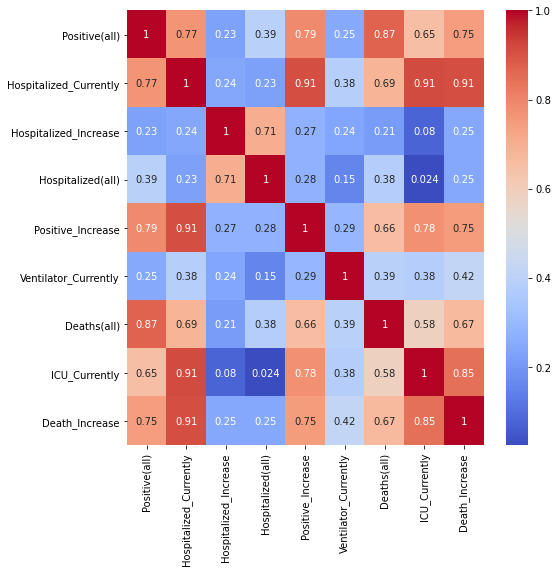

In [77]:
plt.figure(figsize=(8,8))
seaborn.heatmap(long_data.corr(), annot=True, cmap="coolwarm")

In [78]:
#drop all missing data
covid_plot = long_data.dropna()
#compute descriptive statistics
covid_plot.describe()

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
count,663.00,663.00,663.00,663.00,663.00,663.00,663.00,663.00,663.00
mean,"5,110,051.70","30,964.37","1,170.97","172,987.27","43,203.84","2,066.04","110,266.87","6,284.38",773.64
std,"9,386,518.81","57,946.38","2,276.09","315,017.20","85,630.02","4,537.34","180,400.51","14,412.06","1,471.40"
min,702.00,0.00,"-11,560.00",0.00,38.00,0.00,0.00,0.00,0.00
25%,"328,602.50","2,554.50",0.00,0.00,"4,106.50",0.00,"7,702.00",0.00,76.00
50%,"1,848,484.00","11,702.00",298.00,"29,914.00","16,739.00",0.00,"37,061.00","1,117.00",290.00
75%,"5,688,757.00","33,599.50","1,390.00","209,014.50","44,242.00","2,213.00","131,583.50","6,768.50",826.50
max,"94,864,907.00","637,255.00","17,197.00","2,165,477.00","1,032,411.00","37,974.00","1,306,292.00","144,694.00","16,771.00"


<AxesSubplot:>

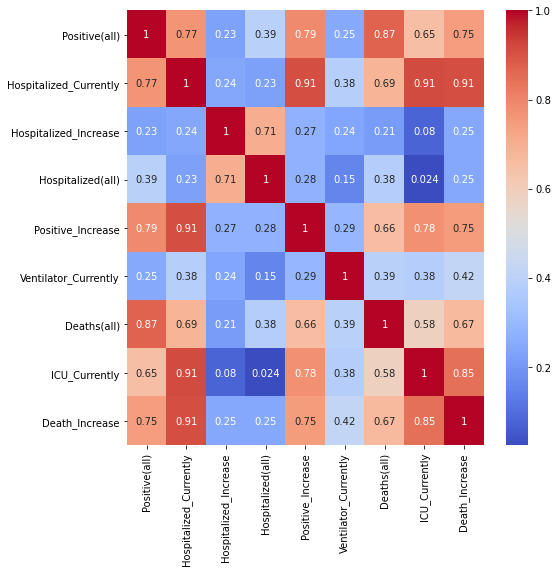

In [79]:
#seaborn plot with complete case data set
plt.figure(figsize=(8,8))
seaborn.heatmap(covid_plot.corr(), annot=True, cmap="coolwarm")

#given that the data is skweded, we need to use a spearman correlation

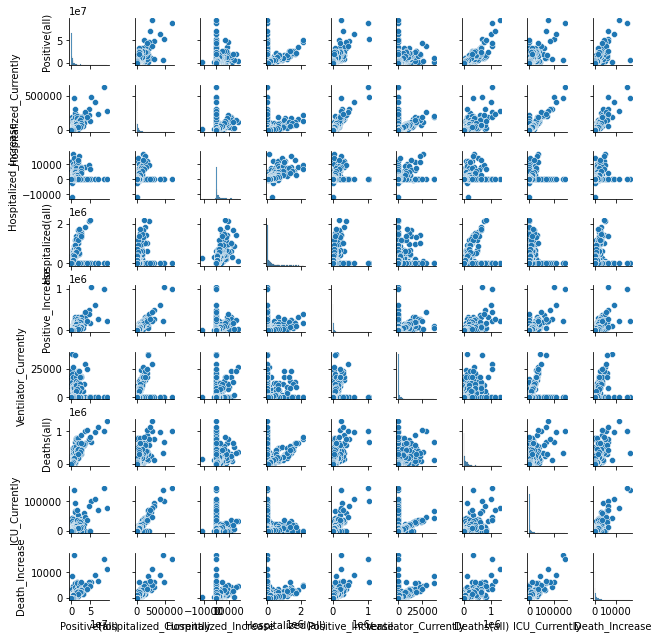

In [80]:
#compare pairplot and heatmap positive and negative correlations
seaborn.pairplot(covid_plot, height=1)

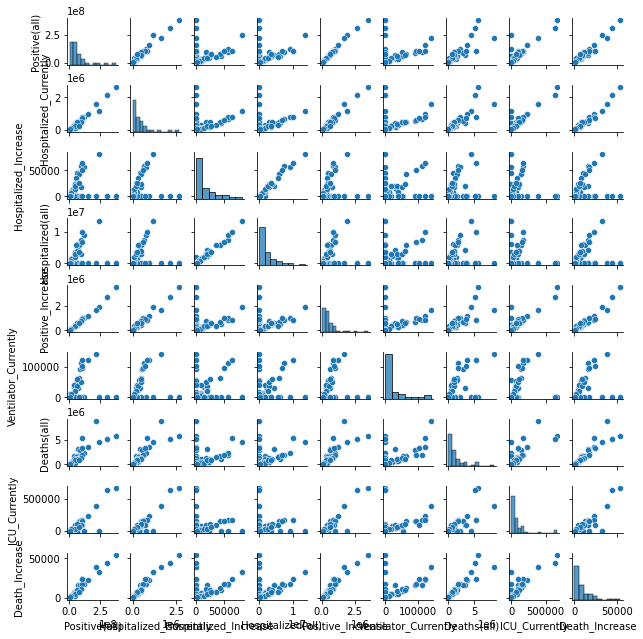

In [81]:
#just looking at total numbers by state
seaborn.pairplot(state_group, height=1)

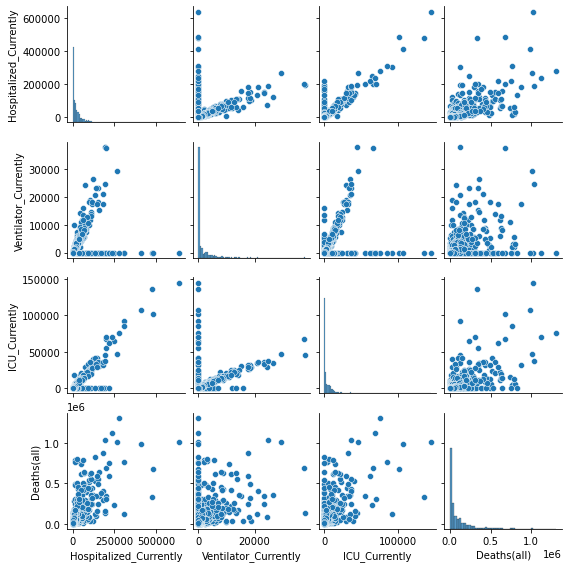

In [82]:
long_data2 = Grouped_Covid_Info_Graphs_Df[['Hospitalized_Currently', 'Ventilator_Currently',
                      'ICU_Currently','Deaths(all)']]
seaborn.pairplot(long_data2, height=2)

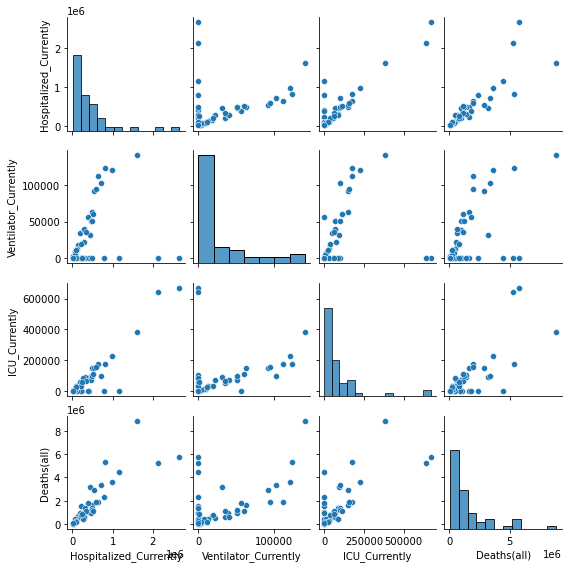

In [83]:
short_data = state_group[['Hospitalized_Currently', 'Ventilator_Currently',
                      'ICU_Currently','Deaths(all)']]
seaborn.pairplot(short_data, height=2)

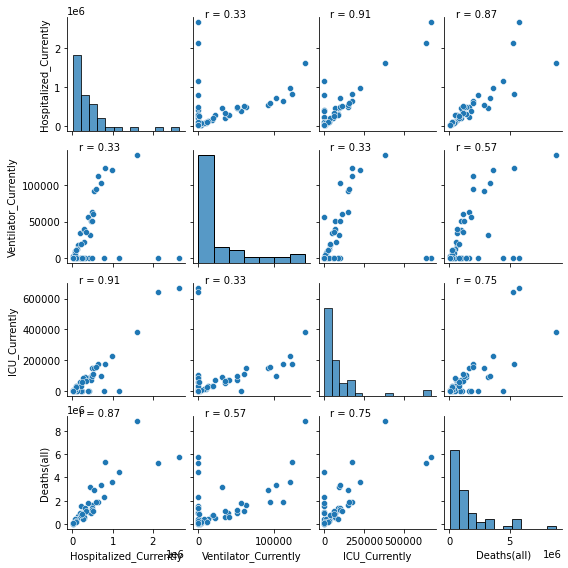

In [84]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)
    
pair_plot = seaborn.pairplot(short_data, height=2)
pair_plot.map_lower(corrfunc)
pair_plot.map_upper(corrfunc)

array([[<AxesSubplot:title={'center':'Hospitalized_Currently'}>,
        <AxesSubplot:title={'center':'Ventilator_Currently'}>],
       [<AxesSubplot:title={'center':'ICU_Currently'}>,
        <AxesSubplot:title={'center':'Deaths(all)'}>]], dtype=object)

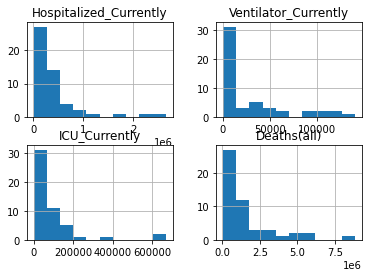

In [85]:
#distribution
short_data.hist()

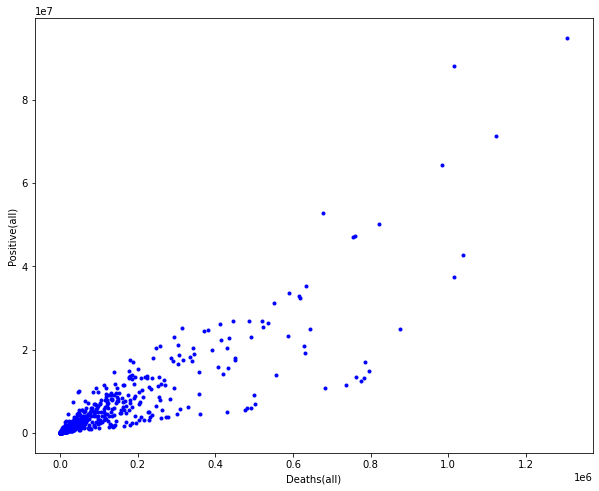

In [86]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]

x= long_data['Deaths(all)']
y= long_data['Positive(all)']

plt.figure(figsize=(10,8))
plt.plot(x,y, 'b.')
plt.xlabel('Deaths(all)')
plt.ylabel('Positive(all)')
plt.show()

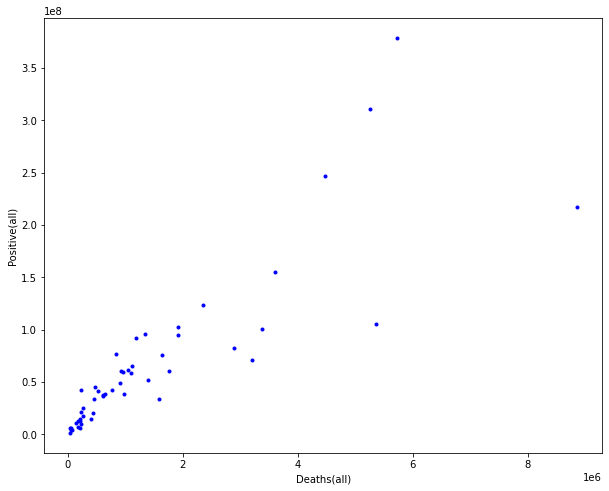

In [87]:
x= state_group['Deaths(all)']
y= state_group['Positive(all)']

plt.figure(figsize=(10,8))
plt.plot(x,y, 'b.')
plt.xlabel('Deaths(all)')
plt.ylabel('Positive(all)')
plt.show()

In [88]:

#define the linear regression
def linear_regression(xvalues, yvalues, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
    values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,values,"r-")
    plt.annotate(line_eq, coordinates, fontsize=14, color='red')
    plt.xlabel('Deaths(all)')
    print(f"The r value is: {rvalue}")
    plt.ylabel(title)
    plt.show()

The r value is: 0.7525442515299862


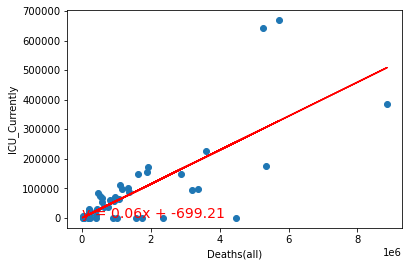

,Positive(all),Hospitalized_Currently,Hospitalized_Increase,Hospitalized(all),Positive_Increase,Ventilator_Currently,Deaths(all),ICU_Currently,Death_Increase
State,,,,,,,,,
AK,"6,158,147.00","17,804.00",1293,"157,626.00",56886,"2,101.00","31,486.00",0.00,305
AL,"62,062,326.00","404,951.00",45976,"6,133,645.00",499819,0.00,"1,038,264.00",0.00,10148
AR,"37,622,536.00","188,044.00",14926,"2,017,857.00",324818,"34,700.00","601,561.00","52,440.00",5319
AZ,"95,464,371.00","640,831.00",57903,"7,425,807.00",826452,"112,235.00","1,918,434.00","172,806.00",16328
CA,"379,100,459.00","2,653,612.00",0,0.00,3501341,0.00,"5,733,089.00","668,693.00",54124
CO,"49,413,695.00","231,196.00",23904,"3,478,740.00",436600,0.00,"908,462.00",0.00,5989
CT,"33,618,419.00","214,270.00",0,"1,908,439.00",285330,0.00,"1,584,666.00",0.00,7704
DC,"6,050,063.00","58,996.00",0,0.00,41419,"9,650.00","207,067.00","15,628.00",1030
DE,"10,219,638.00","61,269.00",0,0.00,88354,0.00,"228,375.00","6,818.00",1473


<Figure size 432x288 with 0 Axes>

In [89]:
#with all data collapsed into state
xvalues = state_group['Deaths(all)']
yvalues = state_group['ICU_Currently']
linear_regression(xvalues, yvalues, 'ICU_Currently', (8,35)) 

plt.savefig('Deaths and ICU.png')
state_group

The r value is: 0.5843130592506096


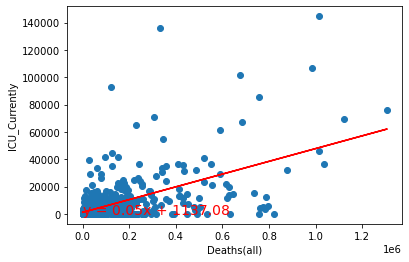

<Figure size 432x288 with 0 Axes>

In [90]:
#with all data grouped by state, month and year
xvalues = long_data['Deaths(all)']
yvalues = long_data['ICU_Currently']
linear_regression(xvalues, yvalues, 'ICU_Currently', (8,35)) 

plt.savefig('Deaths and ICU_long.png')


The r value is: 0.6855887048489897


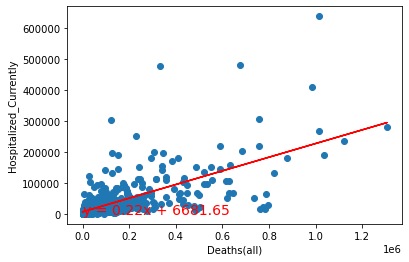

<Figure size 432x288 with 0 Axes>

In [91]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Hospitalized_Currently']
linear_regression(xvalues, yvalues, 'Hospitalized_Currently', (8,35)) 

plt.savefig('Deaths and hos_current.png')


The r value is: 0.39304671189702234


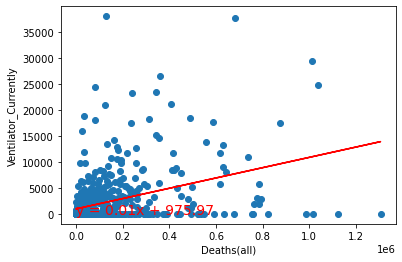

<Figure size 432x288 with 0 Axes>

In [92]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Ventilator_Currently']
linear_regression(xvalues, yvalues, 'Ventilator_Currently', (8,35)) 

plt.savefig('Deaths and vent_current.png')


The r value is: 0.8706230298092408


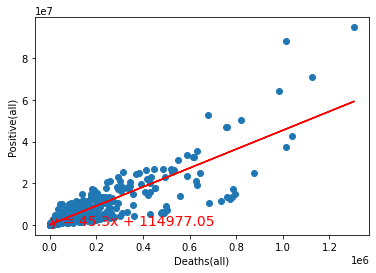

<Figure size 432x288 with 0 Axes>

In [93]:
#long_data = temp_df[['Positive(all)','Hospitalized_Currently', 'Hospitalized_Increase',
 #                   'Hospitalized(all)', 'Positive_Increase', 'Ventilator_Currently',
  #                  'Deaths(all)', 'ICU_Currently','Death_Increase']]
xvalues = long_data['Deaths(all)']
yvalues = long_data['Positive(all)']
linear_regression(xvalues, yvalues, 'Positive(all)', (8,35)) 

plt.savefig('Deaths and positive.png')
